In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Carregar o modelo pré-treinado ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')  # pooling='avg' para pegar o descritor global

# Função para carregar as imagens de uma pasta e extrair os descritores
def extract_descriptors_from_directory(directory):
    descriptors = []
    filenames = []
    
    # Iterar sobre os arquivos na pasta
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):  # Pode ajustar as extensões conforme necessário
                img_path = os.path.join(subdir, file)
                
                # Carregar e pré-processar a imagem
                img = image.load_img(img_path, target_size=(224, 224))
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)
                
                # Extrair o descritor da imagem usando ResNet50
                descriptor = base_model.predict(img_array)
                descriptors.append(descriptor.flatten())  # Descartar a dimensão extra e achatar o vetor
                filenames.append(file)
    
    return np.array(descriptors), filenames

# Diretórios das bases
directories = [
    r'C:\Users\andre.luiz_onfly\Documentos\Base1A',
    r'C:\Users\andre.luiz_onfly\Documentos\Base2A',
    r'C:\Users\andre.luiz_onfly\Documentos\BaseA3'
]

# Extrair os descritores de todas as bases
all_descriptors = []
all_filenames = []
for directory in directories:
    descriptors, filenames = extract_descriptors_from_directory(directory)
    all_descriptors.append(descriptors)
    all_filenames.extend(filenames)

# Combinar todos os descritores em um único array
combined_descriptors = np.vstack(all_descriptors)

# Se desejar, salvar os descritores em um DataFrame do pandas
df = pd.DataFrame(combined_descriptors)
df['filename'] = all_filenames

# Salvar o DataFrame como CSV
df.to_csv('descritores_combinados.csv', index=False)

# Exibir a forma do array combinado
print(f'Forma dos descritores combinados: {combined_descriptors.shape}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [9]:
# Combinar todos os descritores em um único array
combined_descriptors = np.vstack(all_descriptors)

# Se desejar, salvar os descritores em um DataFrame do pandas
df = pd.DataFrame(combined_descriptors)
df['filename'] = all_filenames

# Caminho de saída explícito para salvar o CSV
output_path = r"C:\Users\andre.luiz_onfly\Documentos\descritores_combinados.csv"
df.to_csv(output_path, index=False)

# Exibir a forma do array combinado e o local do arquivo
print(f'Forma dos descritores combinados: {combined_descriptors.shape}')
print(f'Descritores salvos em: {output_path}')

Forma dos descritores combinados: (15096, 2048)
Descritores salvos em: C:\Users\andre.luiz_onfly\Documentos\descritores_combinados.csv


C:\Users\andre.luiz_onfly\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


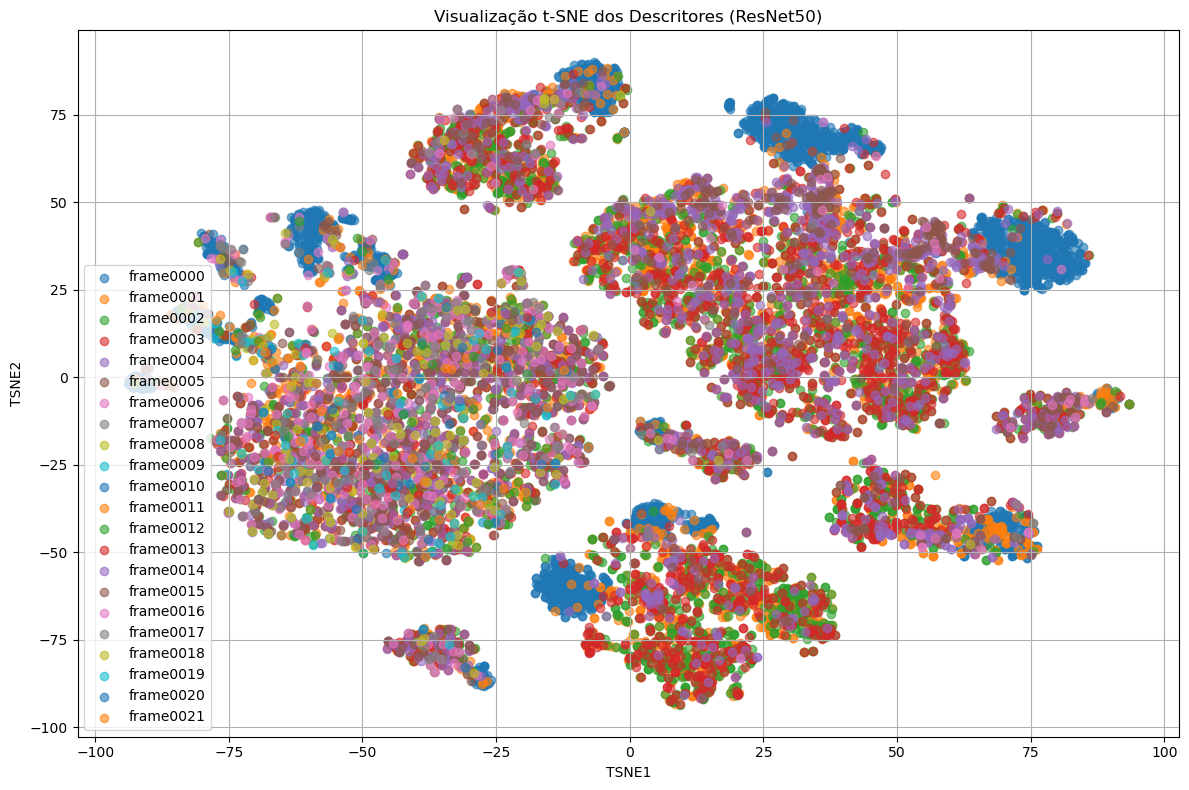

In [14]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Carregar os descritores
df = pd.read_csv(r"C:\Users\andre.luiz_onfly\Documentos\descritores_combinados.csv")

# Separar os descritores (sem a coluna de filename)
X = df.drop(columns=['filename'])

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X)

# Criar DataFrame para visualização
tsne_df = pd.DataFrame(X_embedded, columns=['TSNE1', 'TSNE2'])
tsne_df['filename'] = df['filename']

# Se quiser extrair a classe a partir do nome do arquivo (caso esteja no final, por exemplo: nome_classe.png)
tsne_df['classe'] = tsne_df['filename'].apply(lambda x: x.split('_')[-1].split('.')[0])

# Visualizar
plt.figure(figsize=(12, 8))
for label in tsne_df['classe'].unique():
    subset = tsne_df[tsne_df['classe'] == label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=label, alpha=0.6)

plt.legend()
plt.title('Visualização t-SNE dos Descritores (ResNet50)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)
plt.tight_layout()
plt.show()

